In [1]:
import pandas as pd
df = pd.read_csv("Data1.csv")
df

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


In [2]:
df.columns = ["Date", "Theta1", "Theta2", "Theta3", "Theta4", "Theta5", "Theta6"]
df

,Date,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


In [28]:
df = df.set_index("Date")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002649B44B188>,
      dtype=object)

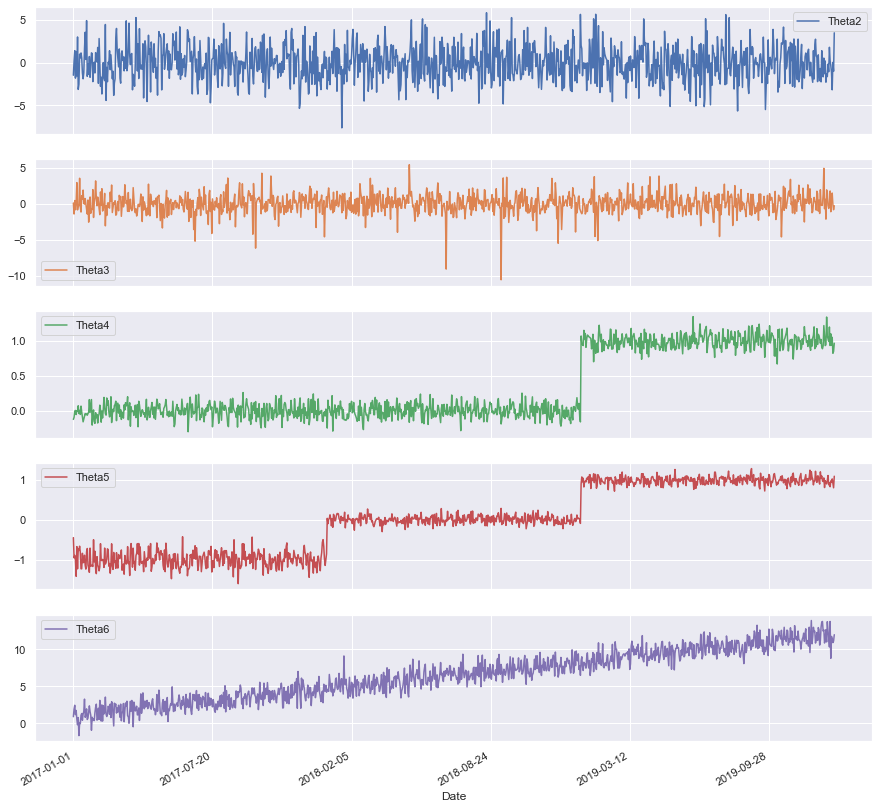

In [30]:
height = 3
width = 15
columns = df.columns.array[1:]
col_num = len(columns)

df.plot(y=df.columns.array[1:], subplots=True, figsize=(width, col_num*height))

In [19]:
df_melted = pd.melt(df)
df_melted

,variable,value
0,Theta1,0.756936
1,Theta1,0.767089
2,Theta1,0.404544
3,Theta1,1.313957
4,Theta1,0.209862
...,...,...
6565,Theta6,11.755980
6566,Theta6,11.397092
6567,Theta6,10.918941
6568,Theta6,11.140722


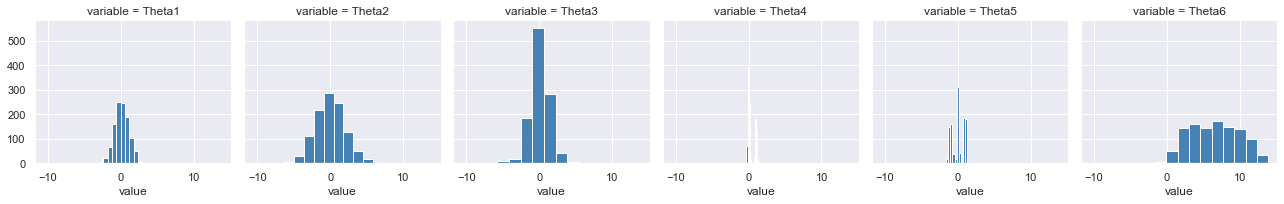

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

grid = sns.FacetGrid(data=df_melted, col="variable", margin_titles=True)
grid.map(plt.hist, "value", color="steelblue")

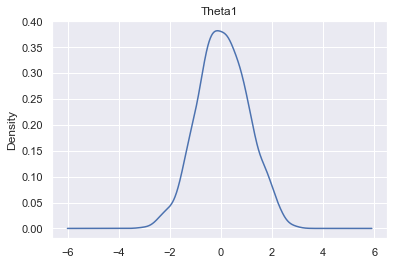

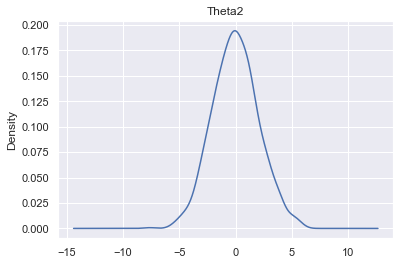

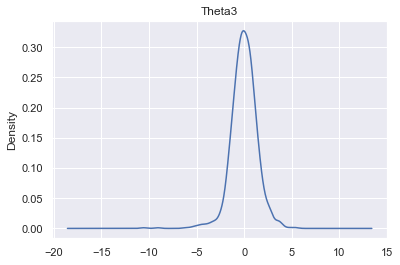

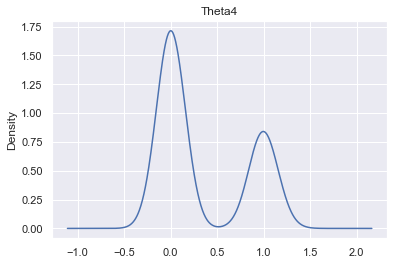

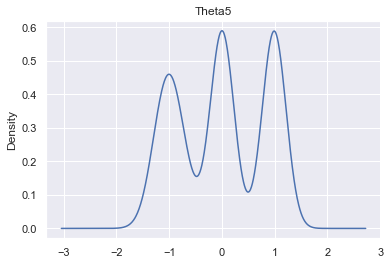

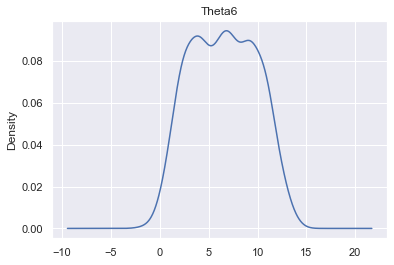

<Figure size 432x288 with 0 Axes>

In [21]:
for col_name in df:
    df[col_name].plot.kde(title=col_name)
    plt.figure()